## ggplot2 vs Base Graphics

### Compared to base graphics, ggplot2
* is more verbose for simple and canned graphics
* is less verbose for complex / custom graphics
* does not have methods (data should always be in a data.frame)
* uses a different system for adding plot elements

### That said, there are some things you cannot (or should not) do with ggplot2:
* 3-dimensional graphics (see the rgl package)
* Graph-theory type graphs (nodes/edges layout; see igraph package)
* interactive graphics (see the ggvis package)

## What is the grammar of graphics?
The basic idea: independently specify plot building blocks and combine them to create just about any kind of graphical display you want. Building blocks of a graph include:
* data
* aesthetic mapping
* geometric object
* statistical transformations
* scales
* coordinate system
* position adjustments
* faceting

## Example data: Housing prices
Let's look at housing prices

## set working directory

In [4]:
setwd('C:/Users/ATPs/Documents/GitHub/XCProject/course/ggplot2')
getwd()

[1] "C:/Users/ATPs/Documents/GitHub/XCProject/course/ggplot2"

In [5]:
housing <- read.csv("dataSets/landdata-states.csv")
head(housing[1:5])

State,region,Date,Home.Value,Structure.Cost
AK,West,2010.25,224952,160599
AK,West,2010.50,225511,160252
AK,West,2009.75,225820,163791
AK,West,2010.00,224994,161787
AK,West,2008.00,234590,155400
AK,West,2008.25,233714,157458


## ggplot2 vs Base for simple graphs
Base graphics histogram example

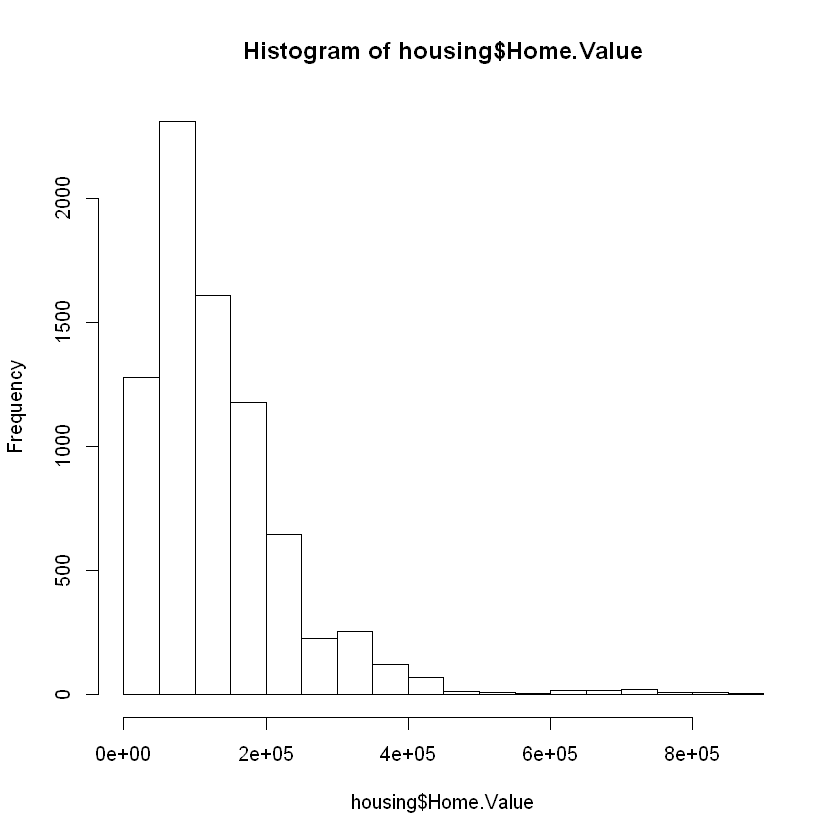

In [6]:
hist(housing$Home.Value)

ggplot2 histogram example

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


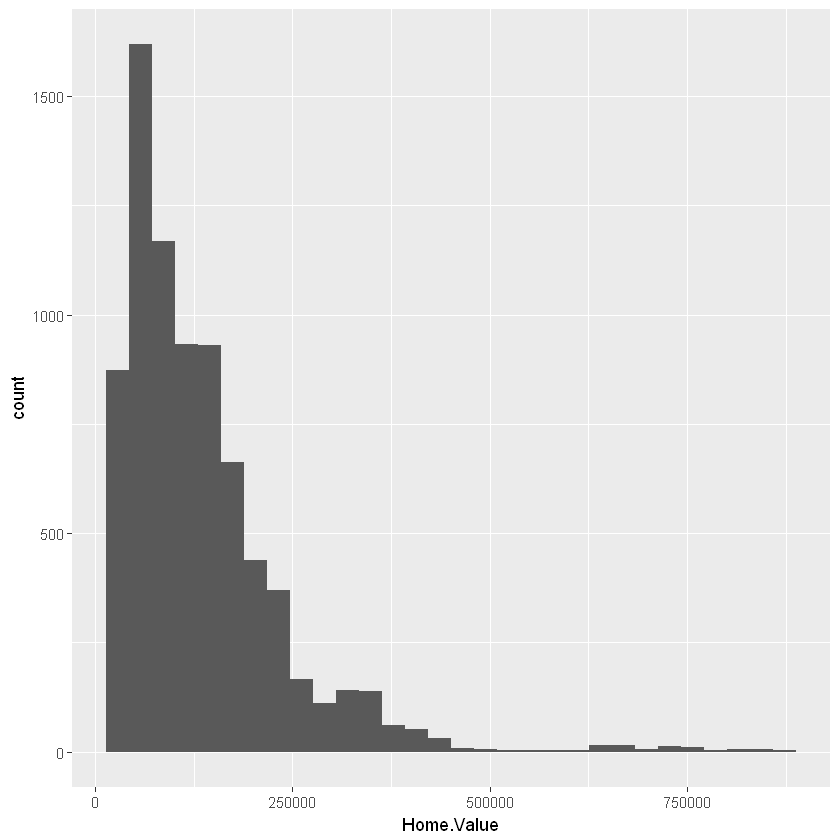

In [7]:
library(ggplot2)
ggplot(housing, aes(x = Home.Value)) + geom_histogram()

## ggplot2 Base graphics VS ggplot for more complex graphs:
base colored scatter plot example

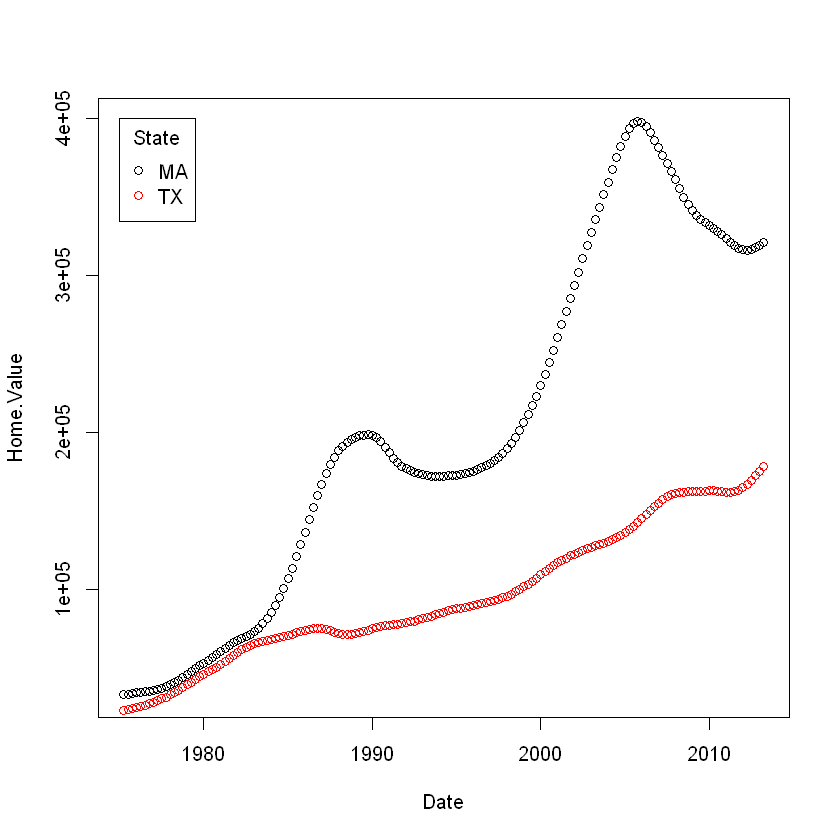

In [10]:
plot(Home.Value ~ Date, data = subset(housing, State == "MA"))
points(Home.Value ~ Date, col = "red", data = subset(housing, State == "TX"))
legend(1975, 400000, c("MA","TX"), title = "State", col = c("black", "red"), pch = c(1, 1))

ggplot2 colored scatter plot example:

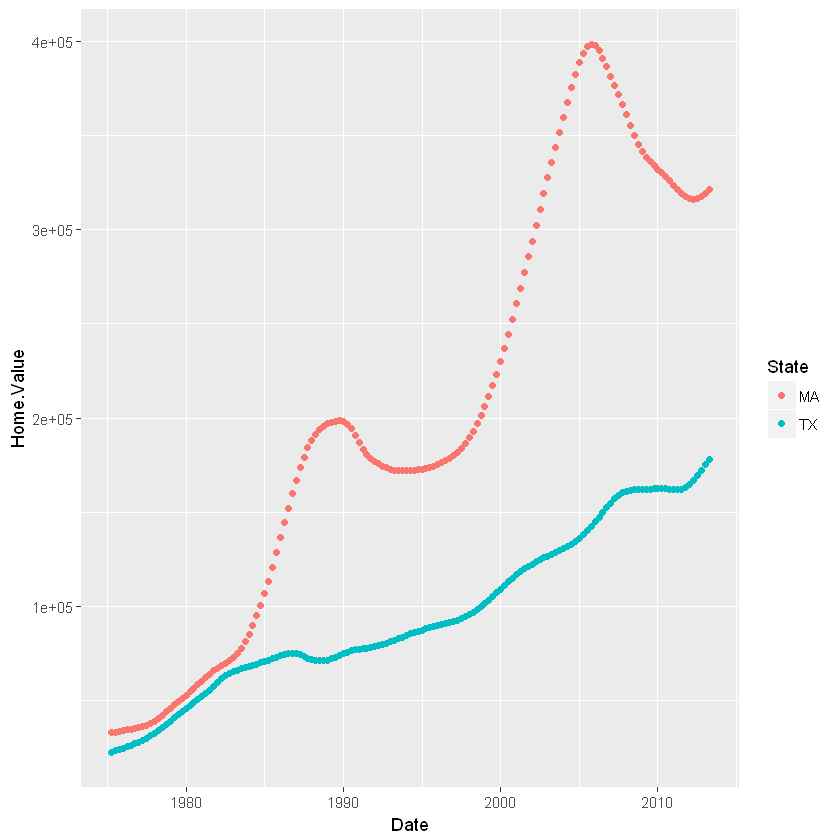

In [11]:
ggplot(subset(housing, State %in% c("MA", "TX")), aes(x = Date, y = Home.Value, color = State)) + geom_point()

## Geometric Objects and Aesthetics
### Aesthetic Mapping
In ggplot land *aesthetic* means "something you can see". Examples include:
* position (i.e., on the x and y axes)
* color ("outside" color)
* fill ("inside" color)
* shape (of points)
* linetype
* size
Each type of the geom accepts only a subset of all aesthetics-refer to the geom help pages to see what mapping each geom accepts. Aesthetic mappings are set with the `aes()` function.

### Geometic Objects (geom)
Geometric objects are the actual marks we put on a plot. Examples include:
* points (`geom_point`, for scatter plots, dot plots, etc)
* lines (`geom_line`, for time series, trend lines, etc)
* boxplot (`geom_boxplot`, for, well, boxplots!)
A plot must have at least one geom; there is no upper limit. You can add a geom to a plot using the `+` operator
You can get a list of available geometric objects using the code below:

In [12]:
help.search("geom_", package = "ggplot2")

starting httpd help server ... done


or simple type geom_<tab> in any good R IDE (such as Rstudio or ESS) to see a list of functions starting with geom_

## Points (Scatterplot)
Now that we know about geometric objects and aesthetic mapping, we can make a ggplot. `geom_point` requires mappings for x and y, all others are optional.

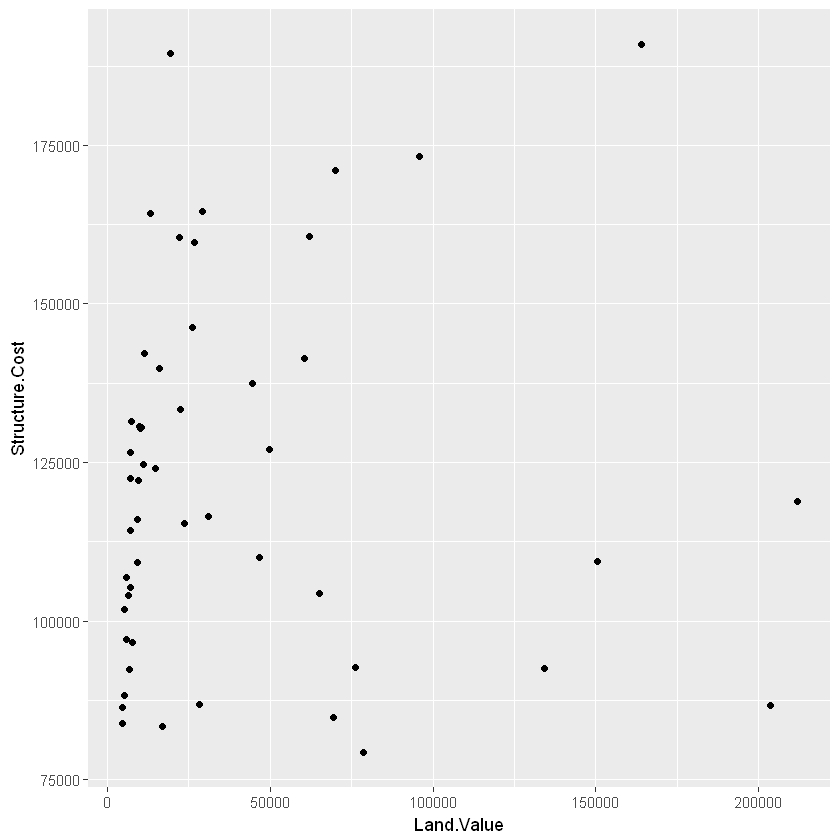

In [14]:
hp2001Q1 <- subset(housing, Date == 2001.25)
ggplot(hp2001Q1, aes(y = Structure.Cost, x = Land.Value)) + geom_point()

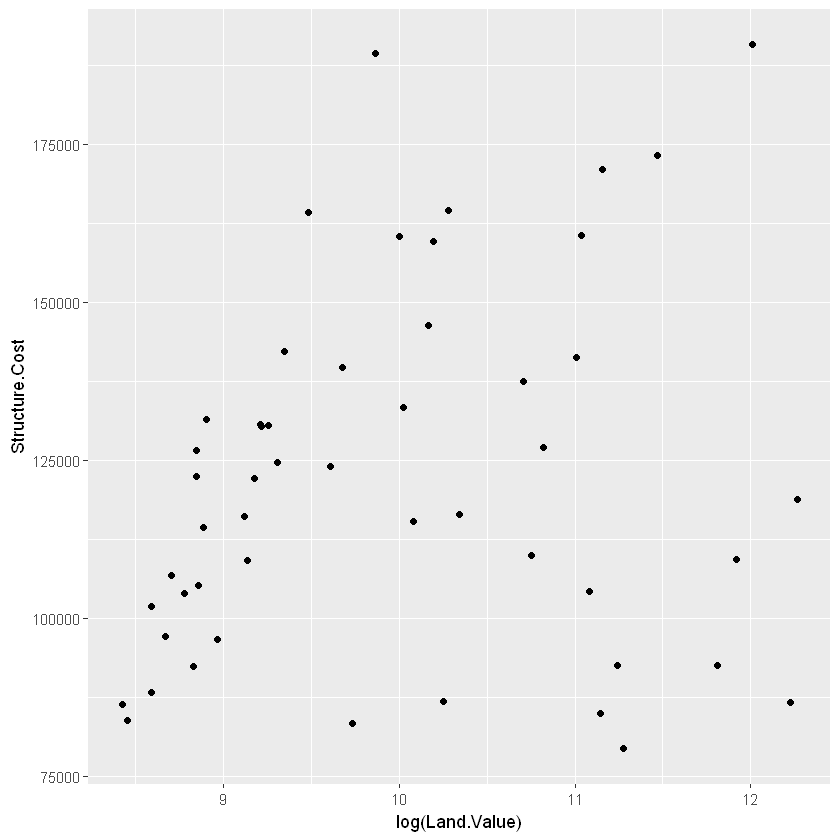

In [15]:
ggplot(hp2001Q1, aes(y = Structure.Cost, x = log(Land.Value))) + geom_point()

## Lines (Prediction Line)
A plot constructed with `ggplot` can have more than one geom. In that case the mappings established in the `ggplot()` call are plot defaults that can be added to or overridden. Our plot use a regression line:

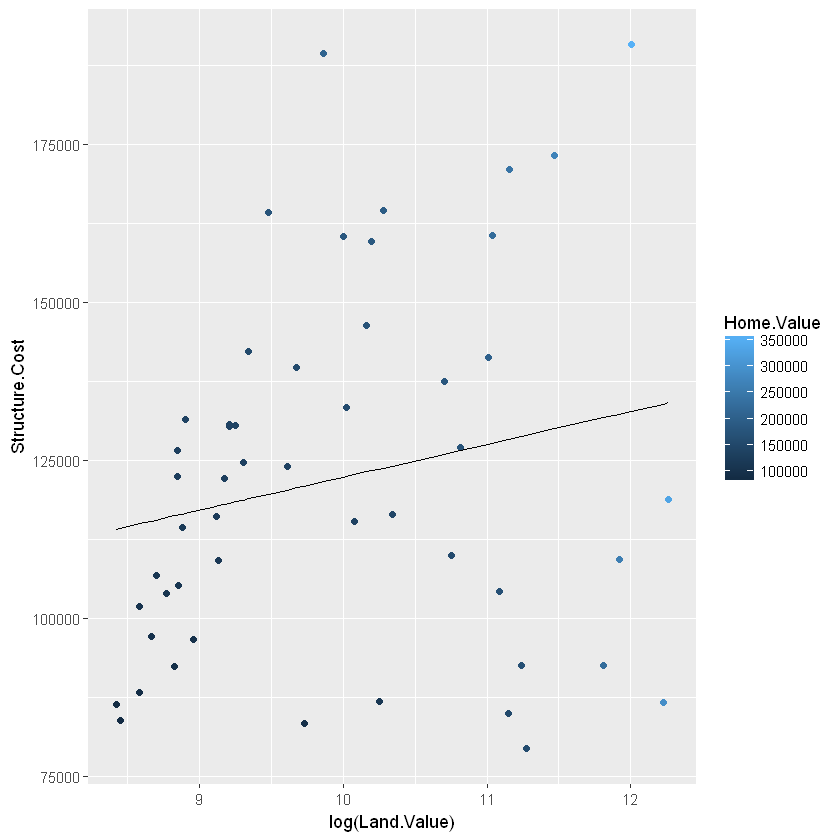

In [18]:
hp2001Q1$pred.SC <- predict(lm(Structure.Cost ~ log(Land.Value), data = hp2001Q1))
p1 <- ggplot(hp2001Q1, aes (x = log(Land.Value), y = Structure.Cost))
p1 + geom_point(aes(color = Home.Value)) + geom_line(aes(y = pred.SC))

## Smoothers
Not all geometric objects are simple shapes-the smooth geom includes a line and a ribbon.

`geom_smooth()` using method = 'loess'


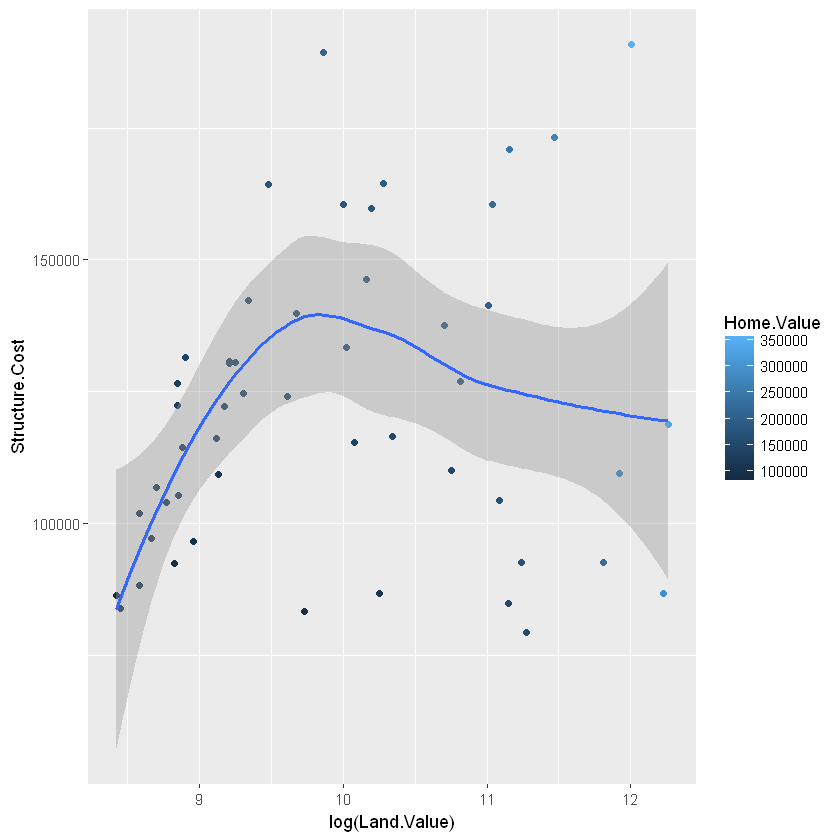

In [20]:
p1 + geom_point(aes(color = Home.Value)) + geom_smooth()

## Text (Label Points)
Each `geom` accepts a particular set of mappings-for example `geom_text()` accepts a `labels` mapping.

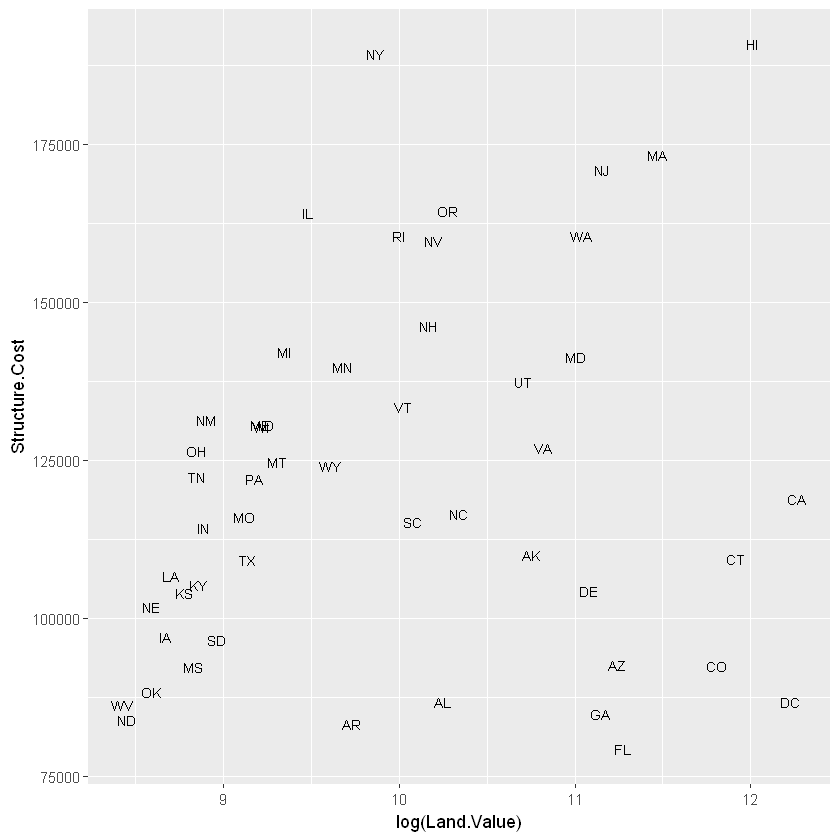

In [21]:
p1 + geom_text(aes(label = State), size = 3)

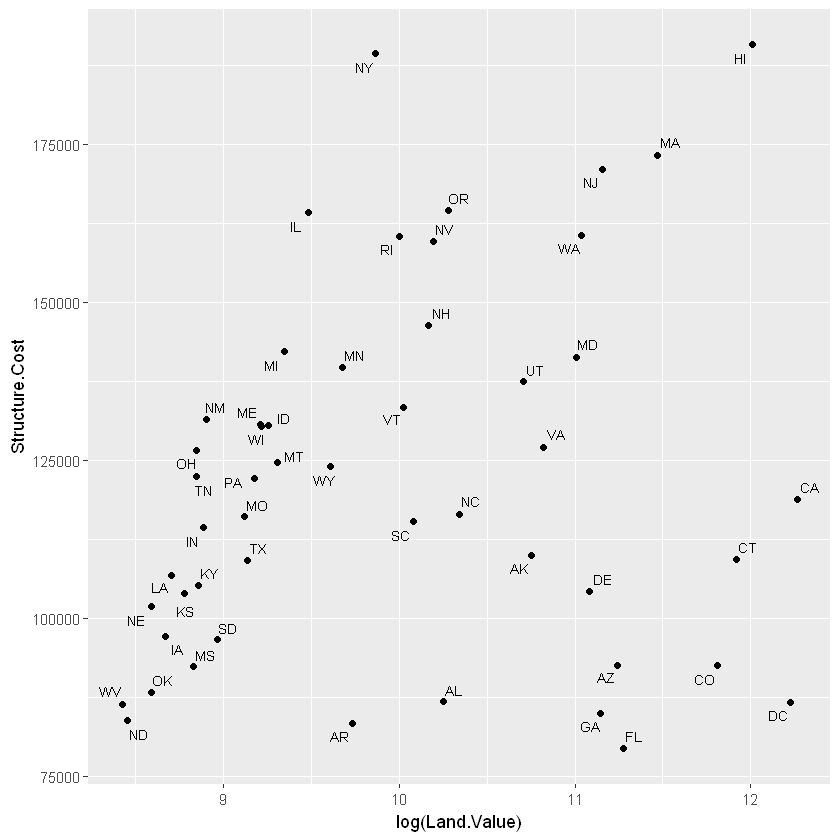

In [24]:
library("ggrepel")
p1 + geom_point() + geom_text_repel(aes(label = State), size = 3)

## Mapping variables to other aesthetics
Other aesthetics are mapped in the same way as x and y in the previous example

Warning message:
"Removed 1 rows containing missing values (geom_point)."

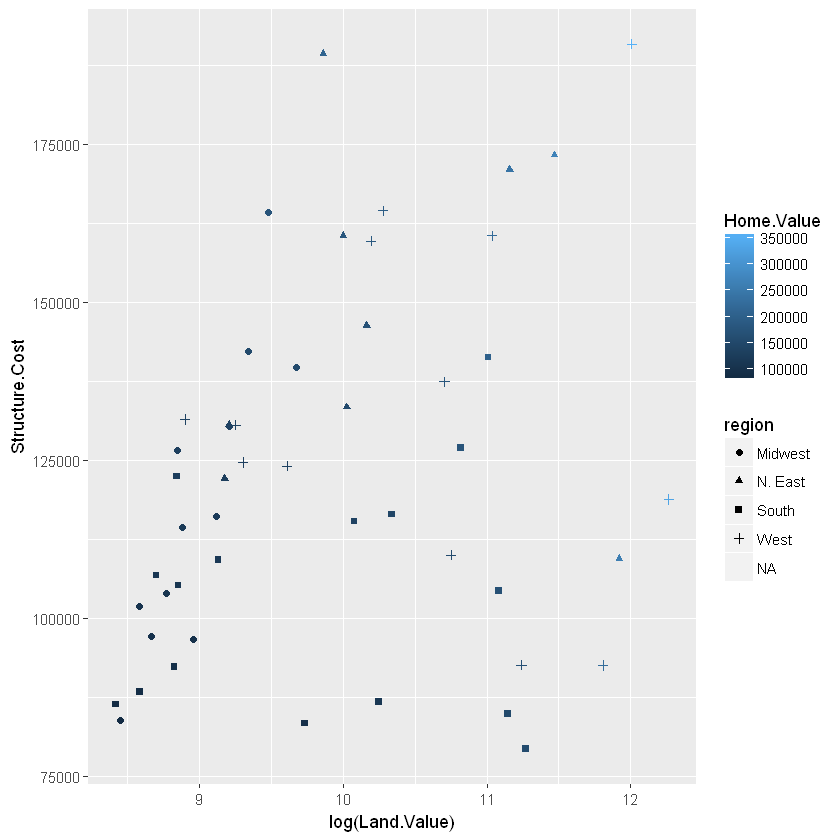

In [25]:
p1 + geom_point(aes(color = Home.Value, shape = region))

## Exercise I
The data for the exercises is available in the `dataSets/EconomistData.csv` file. Read it in with

X,Country,HDI.Rank,HDI,CPI,Region
1,Afghanistan,172,0.398,1.5,Asia Pacific
2,Albania,70,0.739,3.1,East EU Cemt Asia
3,Algeria,96,0.698,2.9,MENA
4,Angola,148,0.486,2.0,SSA
5,Argentina,45,0.797,3.0,Americas
6,Armenia,86,0.716,2.6,East EU Cemt Asia


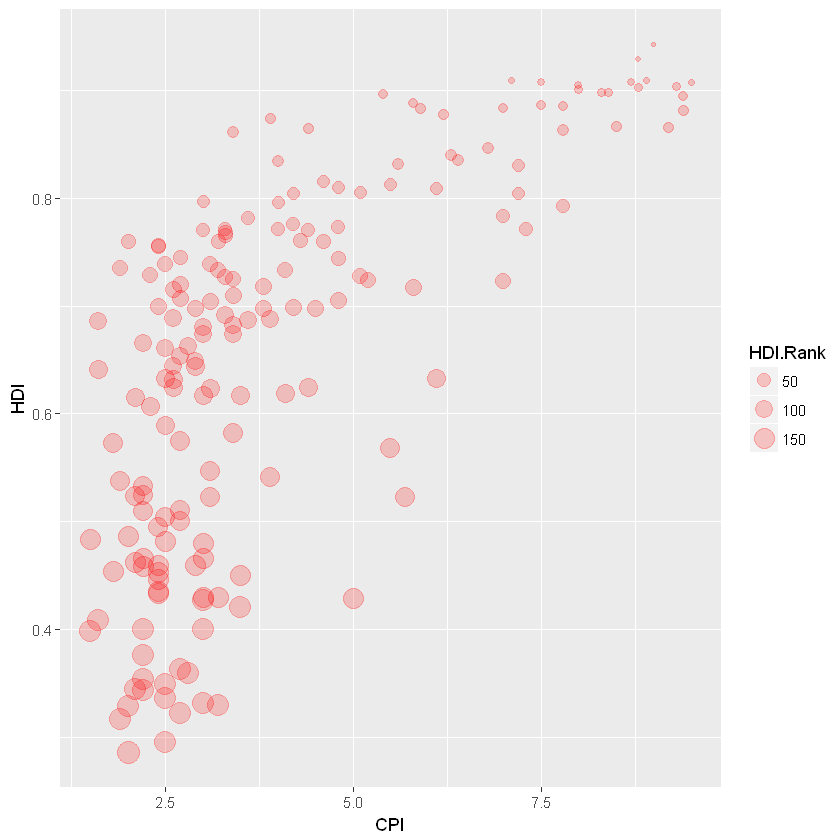

In [29]:
dat <- read.csv("dataSets/EconomistData.csv")
head(dat)
ggplot(dat, aes(x = CPI, y = HDI, size = HDI.Rank)) + geom_point(color = "red", alpha = 0.2)

# Statistical Transformations
## Statistical transformations
Some plot types (such as scatterplots) do not require transformations-each point is plotted at x and y coordinates equal to the original value. Other plots, such as boxplots, histograms, prediction lines etc. require statistical transformations:
* for a boxplot the y values must be transformed to the median and 1.5(IQR)
* for a smoother smother the y values must be transformed into predicted values
Each `geom` has a default statistics, but these can be changed. For example, the default statistic for `geom_bar` is `stat_bin`:

In [31]:
args(geom_histogram)
args(stat_bin)

function (mapping = NULL, data = NULL, stat = "bin", position = "stack", 
    ..., binwidth = NULL, bins = NULL, na.rm = FALSE, show.legend = NA, 
    inherit.aes = TRUE) 
NULL

function (mapping = NULL, data = NULL, geom = "bar", position = "stack", 
    ..., binwidth = NULL, bins = NULL, center = NULL, boundary = NULL, 
    breaks = NULL, closed = c("right", "left"), pad = FALSE, 
    na.rm = FALSE, show.legend = NA, inherit.aes = TRUE) 
NULL

## Setting statistical transformation arguments
Arguments to `stat_` functions can be passed through `geom_` functions. This can be slightly annoying because in order to change it you have to first determine which stat the geom uses, then determine the arguments to that stat.
For example, here is the default histogram of Home.Value:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


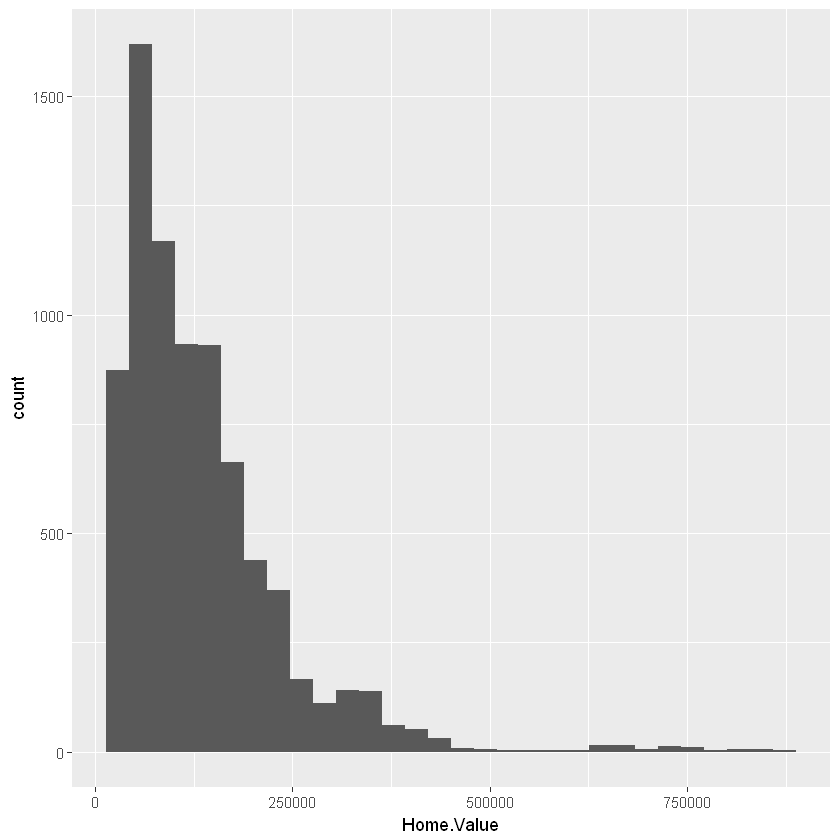

In [32]:
p2 <- ggplot(housing, aes(x = Home.Value))
p2 + geom_histogram()

The bin width looks reasonable by default, but we can change it by passing the `binwidth` argment to the `stat_bin` function:

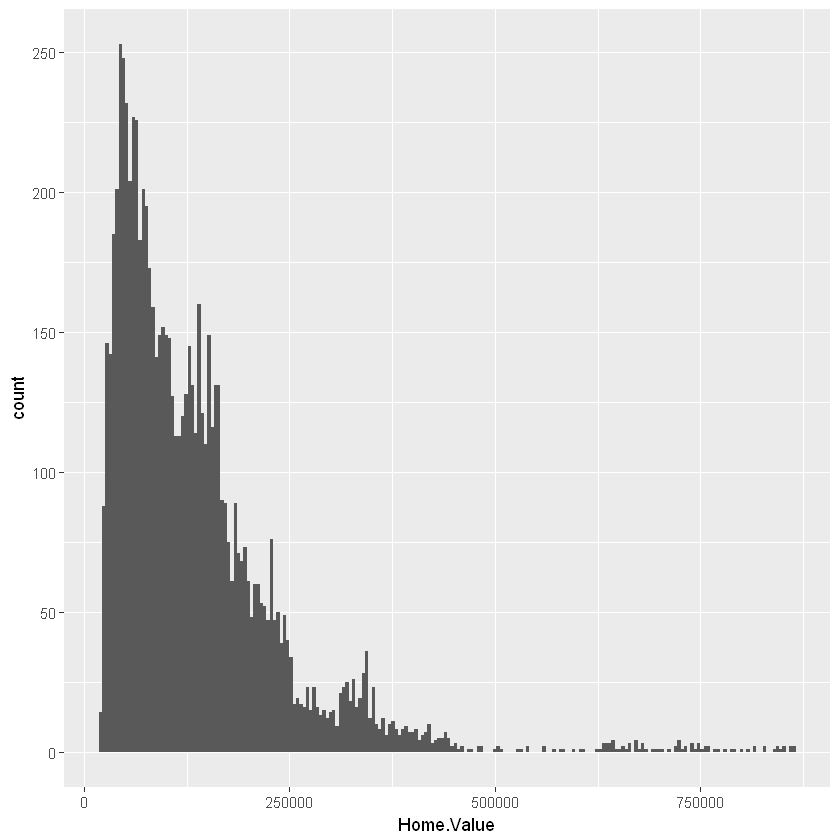

In [33]:
p2 + geom_histogram(stat = "bin", binwidth = 4000)

## Changing the statistical transformation
Sometimes the default transformation is not what you need. This is often the case with the pre-summarized data:

In [34]:
housing.sum <- aggregate(housing["Home.Value"], housing["State"], FUN = mean)
rbind(head(housing.sum), tail(housing.sum))

,State,Home.Value
1,AK,147385.14
2,AL,92545.22
3,AR,82076.84
4,AZ,140755.59
5,CA,282808.08
6,CO,158175.99
46,VA,155391.44
47,VT,132394.60
48,WA,178522.58
49,WI,108359.45


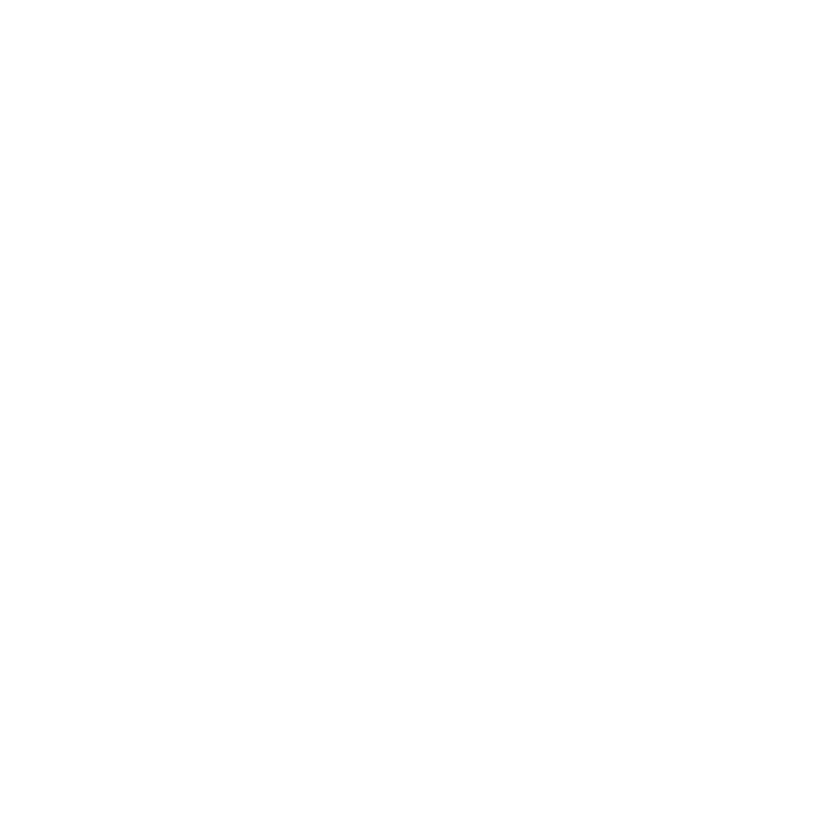

In [36]:
ggplot(housing.sum, aes(x = State, y = Home.Value)) + geom_bar()

What is the problem with the previous plot? Basically we take binned and summarized data and ask ggplot to bin and summarize it again (remember, `geom_bar` defaults to `stat = stat_count`); obviously this will not work. We can fix it by telling `geom_bar` to use a different statistical transformation function:

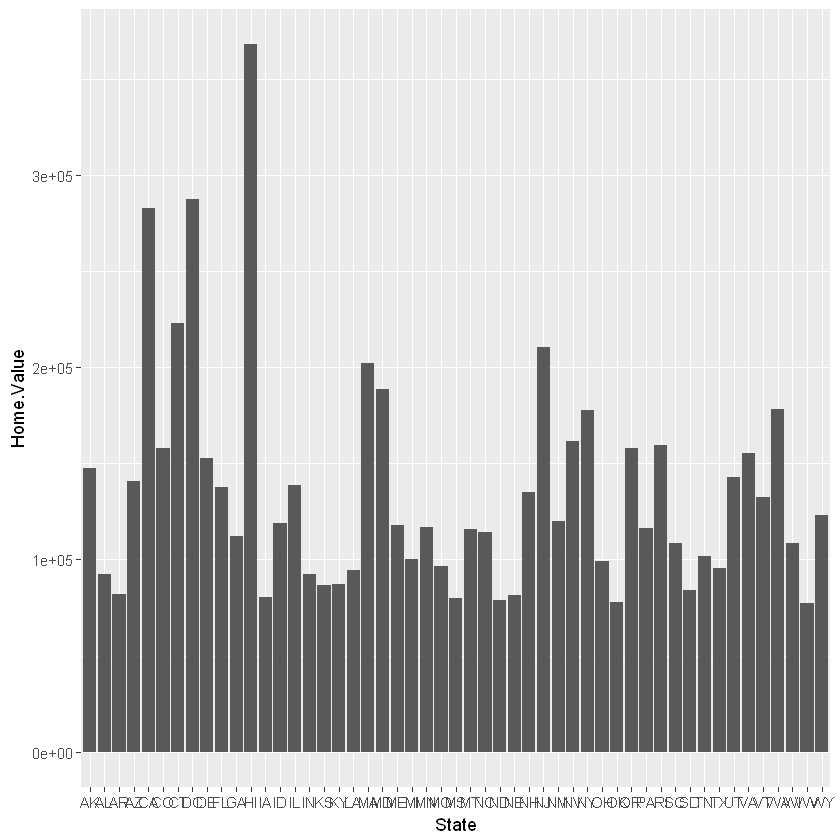

In [37]:
ggplot(housing.sum, aes(x = State, y = Home.Value)) + geom_bar(stat = "identity")

# Scales
## Scales: Controlling Aesthetic Mapping
Aesthetic mapping (i.e., with `aes` only says that a variable should be mapped to an aesthetic. It doesn't say how tha tshould happen. For example, when mapping a variable to a shape with aes(shape = x) you don't say what shapes should be used. Similaly, `aes(color = z)` doesn't say what colors should be used. Describing what colors/shapes/sizes etc. to use is done by modifying the corresponding scale. In `ggplot2` scales include
* position
* color and fill
* size
* shape
* line type

Scales are modified with a series of functions using a `scale_<aesthetic>_<type>` naming scheme.

### Common Scale arguments
the following argments are common to most scales in ggplot2:
* name: the first arguments gives the axis or legent title
* limits: the minumum and maximumn of the scale
* breaks: the points along the scale where labels should appear
* labels: the labels that appear at each break

Specific scale functions may have additional arguments; for example, scale_color_continuous function has arguments low and high for setting the colors at the low and high end of the scale.

### Scale Modification Examples
Start by constructing a dotplot showing the distribution of home values by Date and State.

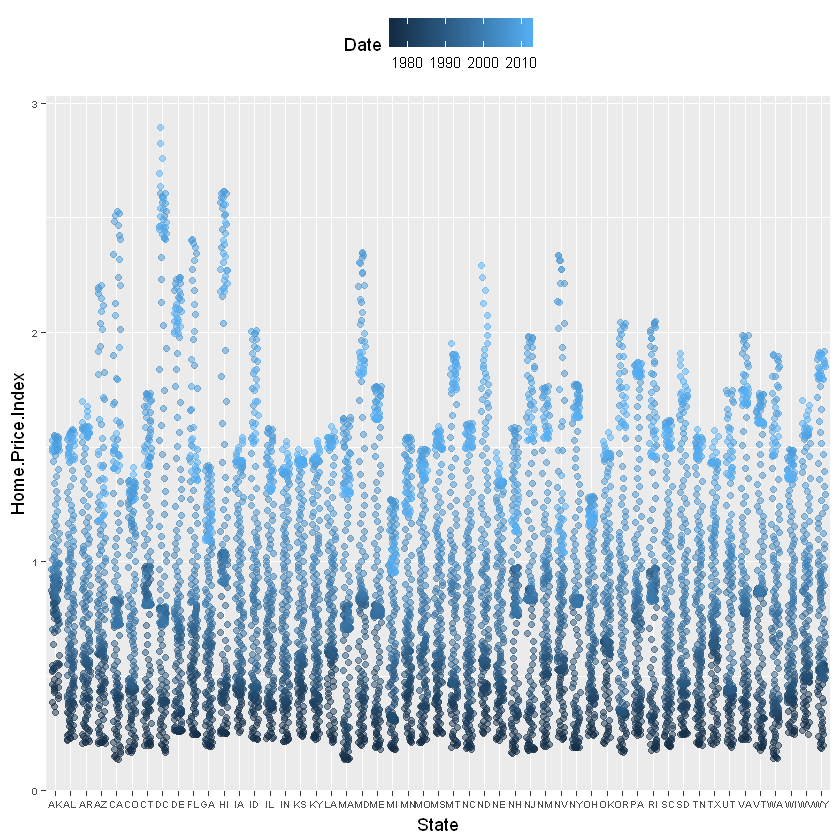

In [40]:
p3  <- ggplot(housing, aes(x = State, y = Home.Price.Index)) + 
        theme(legend.position = "top", axis.text = element_text(size = 6))
(p4 <- p3 + geom_point(aes(color = Date), alpha = 0.5, size = 1.5, position = position_jitter(width = 0.25, height = 0)))

Now modify the breaks for the x axis and color scales

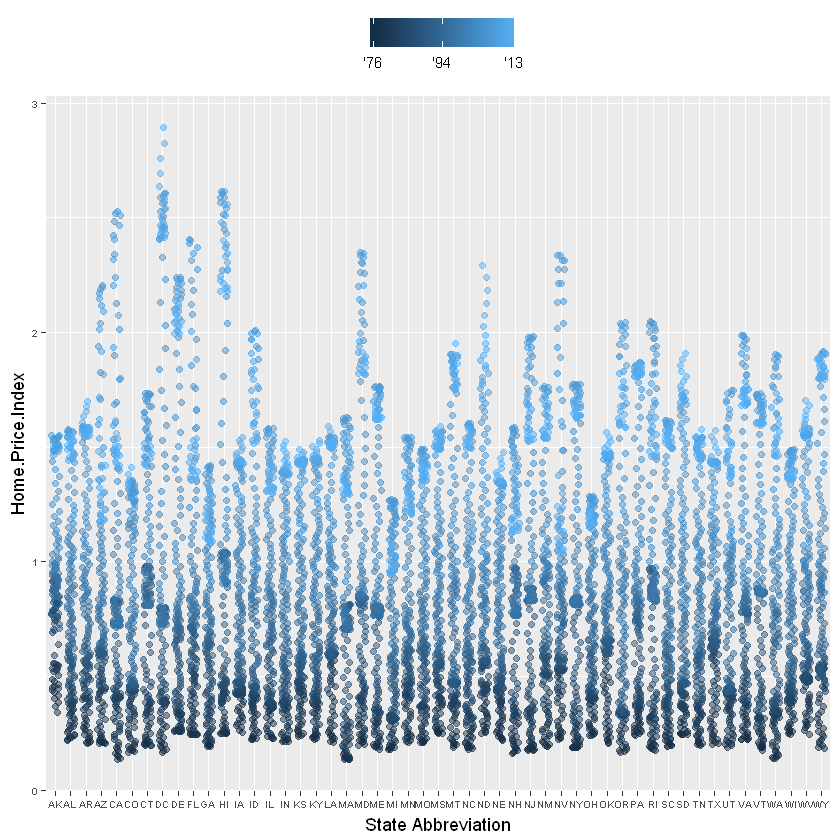

In [45]:
p4 + scale_x_discrete(name = "State Abbreviation") + 
    scale_color_continuous(name = "", breaks = c(1976, 1994, 2013), labels = c("'76", "'94", "'13"))

Next change the low and high values to blue and red:

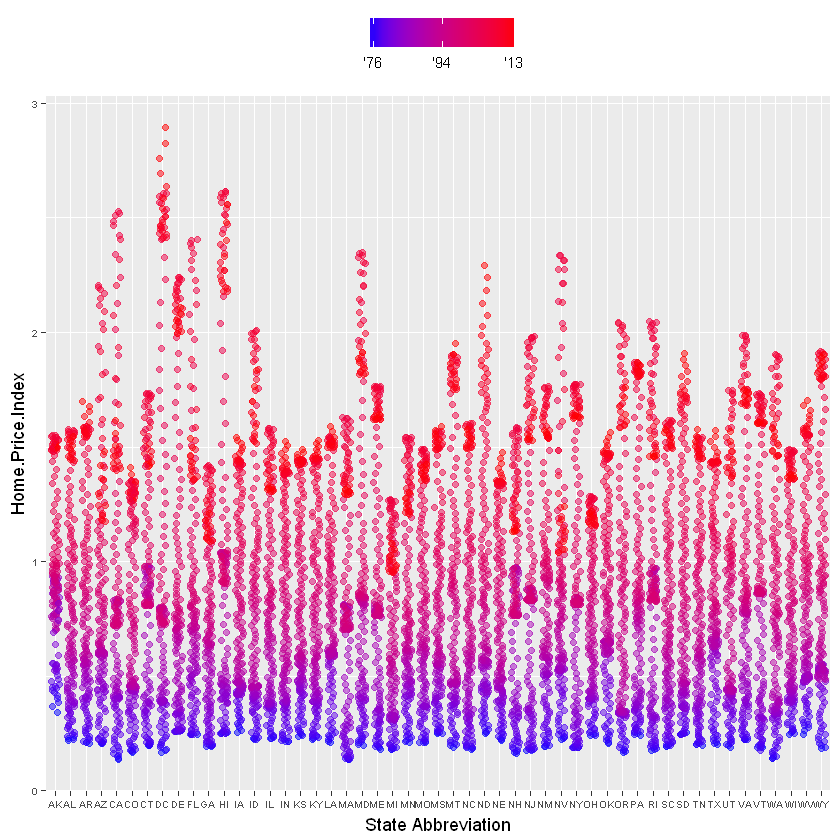

In [44]:
p4 + scale_x_discrete(name = "State Abbreviation") + 
    scale_color_continuous(name = "", breaks = c(1976, 1994, 2013), labels = c("'76", "'94", "'13"), low = "blue", high = "red")

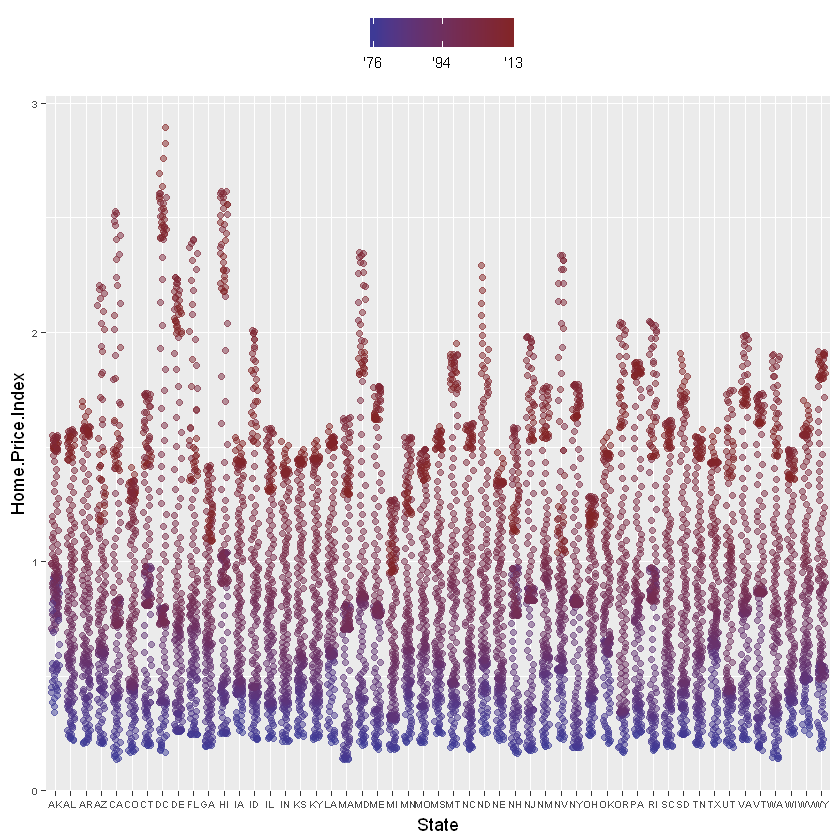

In [47]:
library(scales)
p4 + scale_color_continuous(name = "", breaks = c(1976, 1994, 2013), 
                            labels = c("'76", "'94", "'13"), low = muted("blue"), high = muted("red"))

### Using different color scales
ggplot2 has a wide variety of color scales; here is an example using scale_color_gradient2 to interpolate between three different colors.

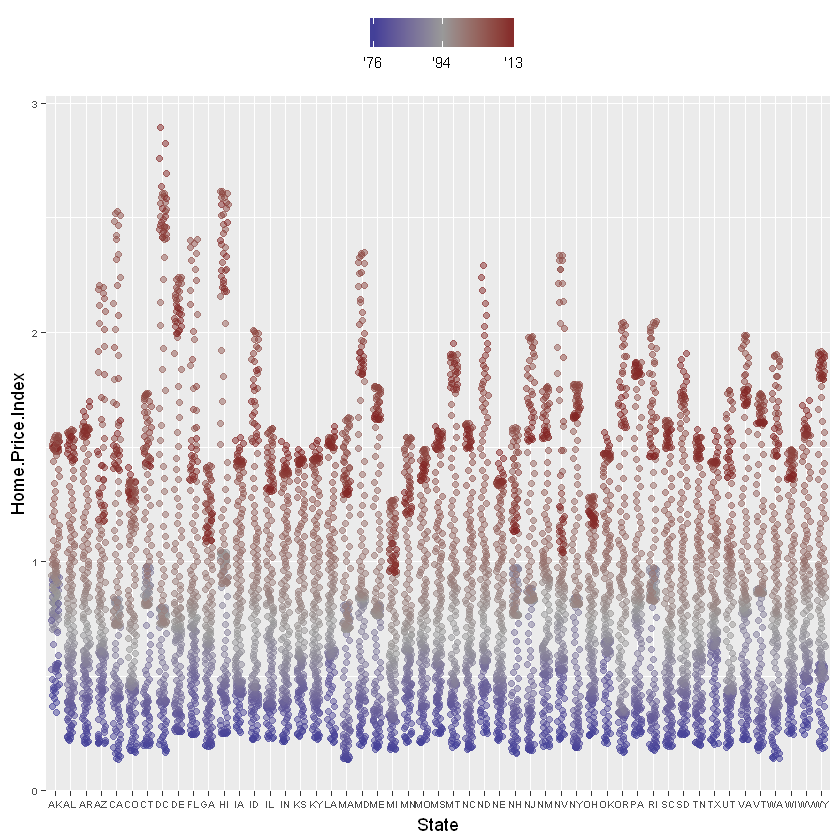

In [48]:
p4 + scale_color_gradient2(name = "", breaks = c(1976, 1994, 2013), labels = c("'76", "'94", "'13"),
                          low = muted("blue"), high = muted("red"), mid = "gray60", midpoint = 1994)

## Faceting

### Faceting
* Facetting is ggplot2 parlance for small **multiples**
* The idea is to create separate graphs for subsets of data
* ggplot2 offers two functions for creating small multiples
    1. facet_wrap(): define subsets as the levels of a single grouping variable
    2. facet_grid(): define subsets as the crossing of two grouping variable
* Facilitates comparison among plots, not just of geoms within a plot

### What is the trend in housing prices in each state?
* Start by using a technique we already know-map State to color:

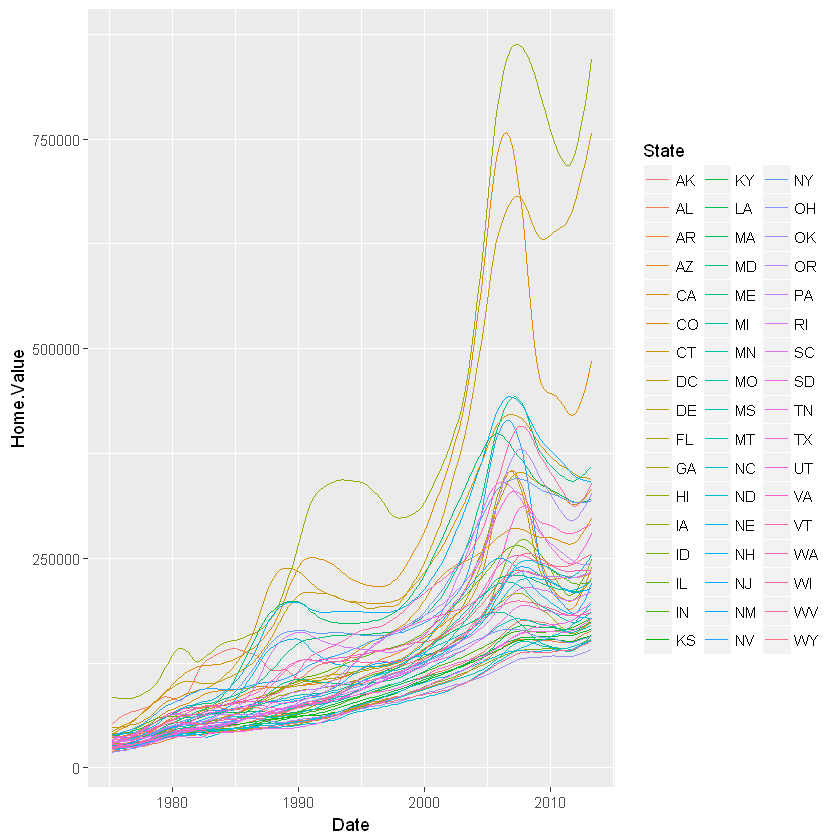

In [49]:
p5 <- ggplot(housing, aes (x = Date, y = Home.Value))
p5 + geom_line(aes(color = State))

There are two problems here-there are too many states to distinguish each one by color, and lines obscure one another.

### Faceting to the rescure
We can remedy the differencies of the previous plot by faceting by state rather than mapping state to color.

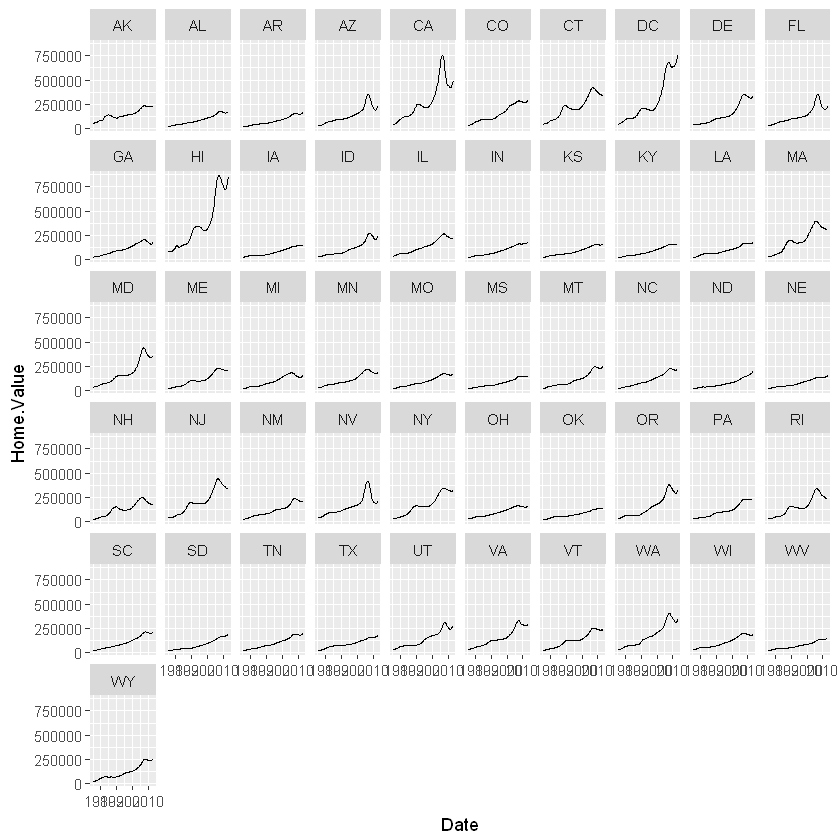

In [50]:
(p5 <- p5 + geom_line() + facet_wrap(~State, ncol = 10))

## Themes
### Themes
the ggplot2 theme system handles non-data plot elements such as
* Axis labels
* Plot background
* Facet label background
* Legend appearance
Built-in themes includes:
* theme_gray() (default)
* theme_bw()
* theme_classic()

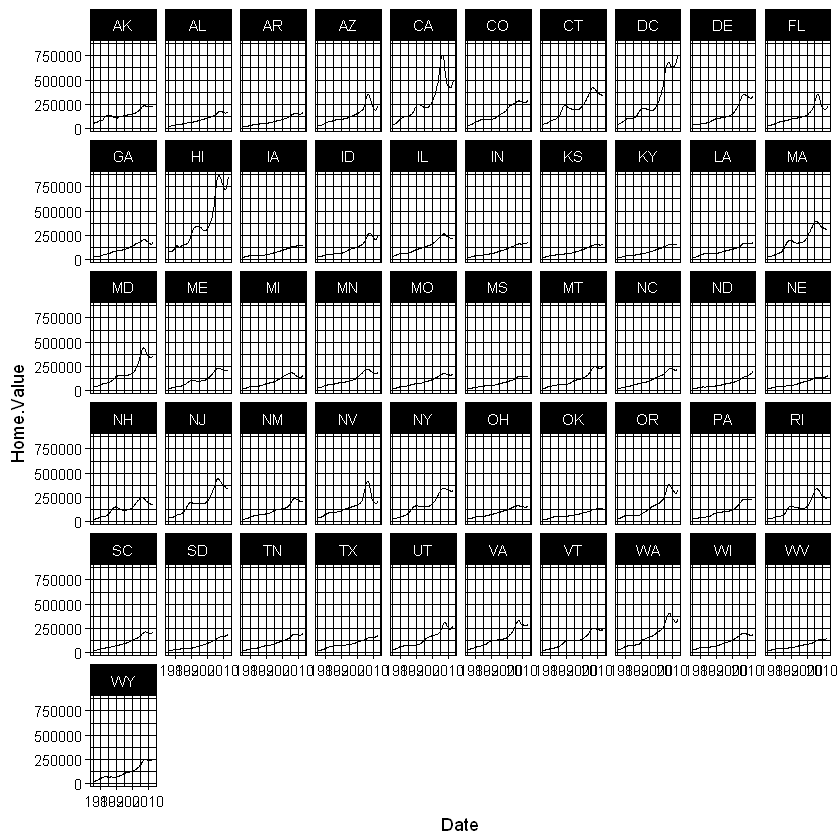

In [52]:
p5 + theme_linedraw()

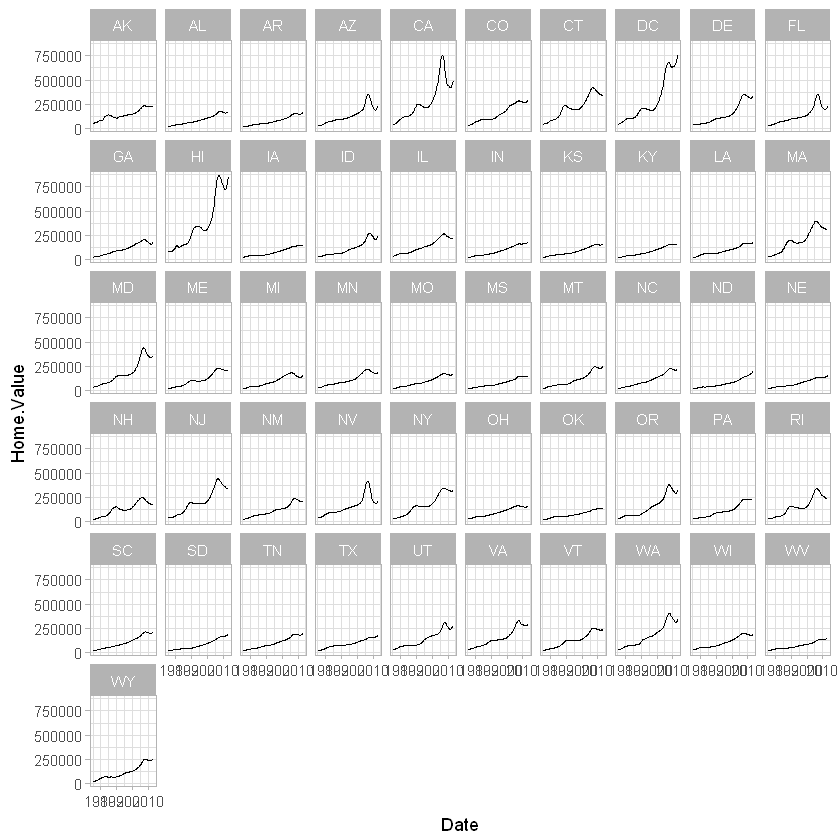

In [53]:
p5 + theme_light()

### Overriding theme defaults
Specific theme elements can be overridden using theme(). For example:

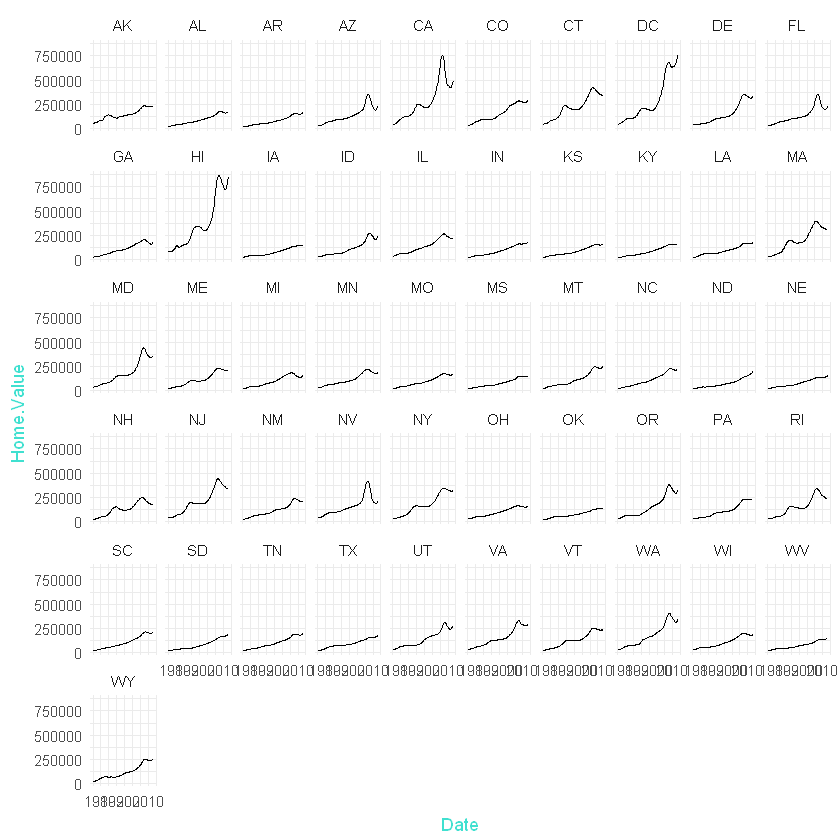

In [54]:
p5 + theme_minimal() + theme(text = element_text(color = "turquoise"))

All theme options are documented in ?theme

### Creating and saving new themes
You can create new themes, as in the following example:

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"Windows字体数据库里没有这样的字体系列"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"Windows字体数据库里没有这样的字体系列"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"Windows字体数据库里没有这样的字体系列"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"Windows字体数据库里没有这样的字体系列"Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
"Windows字体数据库里没有这样的字体系列"

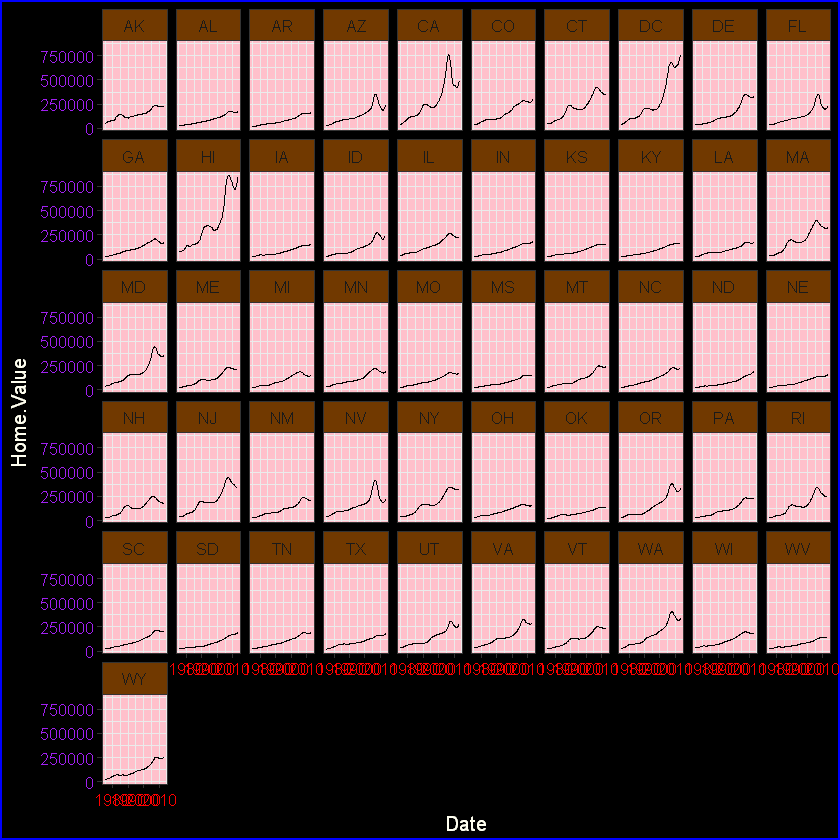

In [65]:
theme_new <- theme_bw() + 
    theme(plot.background = element_rect(size = 1, color = "blue", fill = "black"),
          text = element_text(size = 12,  family = "Serif", color = "ivory"),
          axis.text.y = element_text(color = "purple"),
          axis.text.x = element_text(color = "red"),
          panel.background = element_rect(fill = "pink"),
          strip.background = element_rect(fill = muted("orange")))
p5 + theme_new

### Map aesthetic to different columns
The most frequently asked question goes something like this: I have two variables in my data.frame, and I'd like to plot them as separate poins with different color depending on which variable is. How do I do that?
#### Wrong

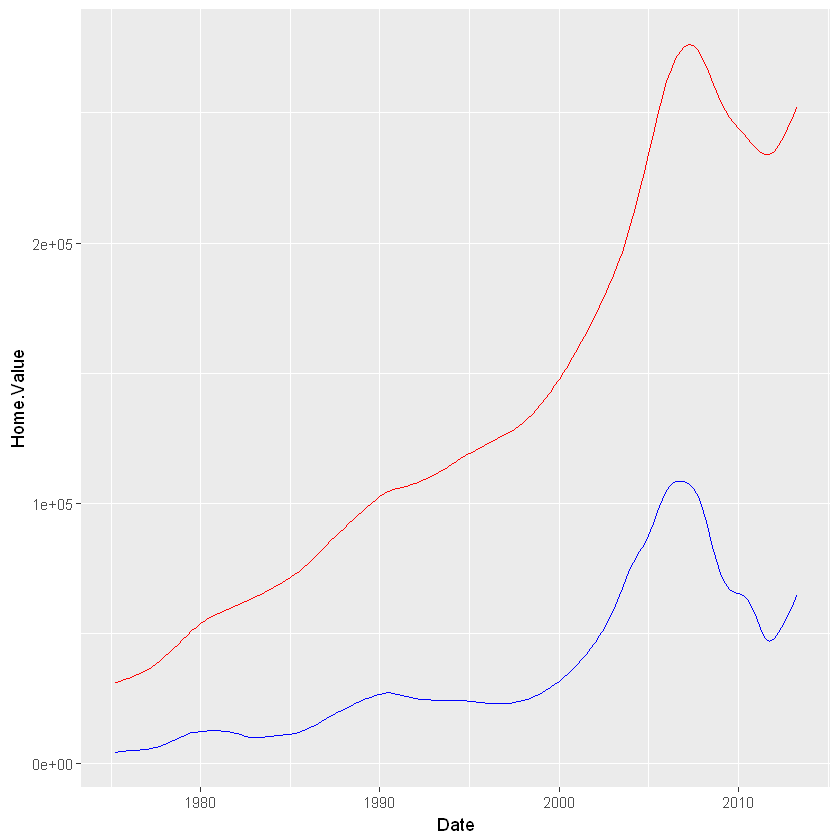

In [67]:
housing.byyear  <- aggregate(cbind(Home.Value, Land.Value) ~ Date, data = housing, mean)
ggplot(housing.byyear, aes(x = Date)) +
    geom_line(aes(y = Home.Value), color = "red") +
    geom_line(aes(y = Land.Value), color = "blue")

#### Right

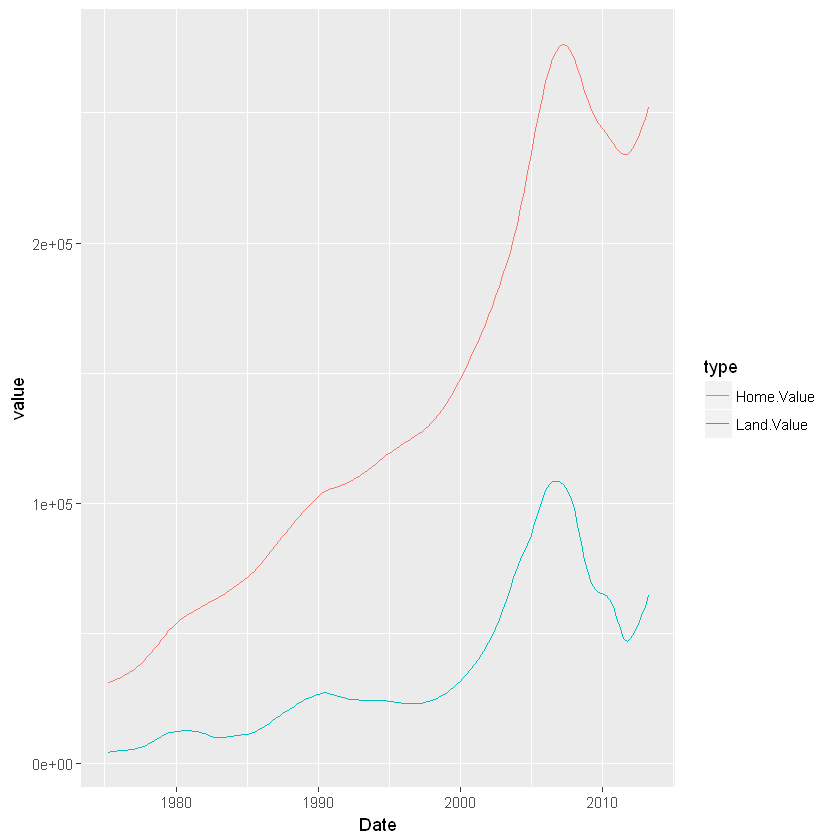

In [70]:
library(tidyr)
home.land.byyear <- gather(housing.byyear, value = "value", key = "type", Home.Value, Land.Value)
ggplot(home.land.byyear, aes(x = Date, y = value, color = type)) + geom_line()

## Putting it all together
### Challenge: Recreate This Economist Graph
Building off of the graphics you created in the previous excercises, put the finishing touches to make it as close as possible to the original economist graph.

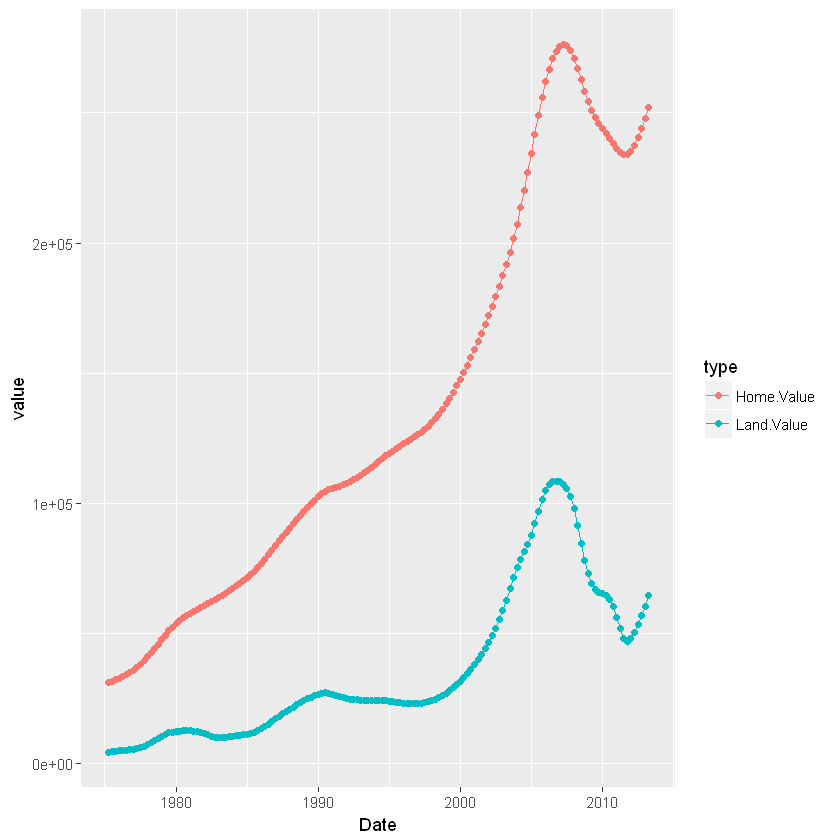

In [75]:
ggplot(home.land.byyear, aes(x = Date, y = value, color = type)) + geom_line() + geom_point()